In [7]:
import numpy as np
from scipy.linalg import expm, sinm, cosm
from scipy import sparse
import scipy
from utils import lossfunc as lf

import sys
sys.path.append('..')

In [8]:
from utils import functions as f

In [9]:
L = 6

Sz = np.zeros([2,2])
Sz[0,0] = 1/2
Sz[1,1] = -1/2
Sx = np.zeros([2,2])
Sx[1,0] = 1/2
Sx[0,1] = 1/2
Sy = np.zeros([2,2], dtype=np.complex64)
Sy[1,0] = 1j/2
Sy[0,1] = -1j/2


SzSz = np.kron(Sz,Sz).astype(np.float64)
SxSx = np.kron(Sx,Sx).astype(np.float64)
SySy = np.kron(Sy,Sy).astype(np.float64)

lh = SzSz + SxSx + SySy
# lh = - lh


LH_ = sparse.csr_matrix((2**3,2**3), dtype = np.float64)
i = 0
LH_ += f.l2nl(lh/2, 3, [0, 1], sps = 2)
LH_ += f.l2nl(lh/2, 3, [0, 2], sps = 2)
LH_ += f.l2nl(lh/2, 3, [1, 2], sps = 2)

/tmp/ipykernel_29449/4162200437.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  SySy = np.kron(Sy,Sy).astype(np.float64)


### exact diagonalization with original matrix

In [10]:
sparse.csr_matrix((2**L, 2**L), dtype=np.float64).toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
lh

array([[ 0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  0.5 ,  0.  ],
       [ 0.  ,  0.5 , -0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.25]])

In [12]:
from importlib import reload
from scipy import sparse
import scipy.sparse.linalg
import scipy
reload(f)
L = 6
# H = sparse.csr_matrix((2**L, 2**L), dtype=np.float64)
H = np.zeros((2**L, 2**L), dtype=np.float64)
for i in range(L):
    
    H += f.l2nl(lh, L, [i,(i+1)%L], sps = 2)
    H += f.l2nl(lh/2, L, [i,(i+2)%L], sps = 2)   

E, V = np.linalg.eigh(H)
print(E)

[-2.25000000e+00 -2.25000000e+00 -1.75000000e+00 -1.75000000e+00
 -1.75000000e+00 -1.56872930e+00 -1.56872930e+00 -1.56872930e+00
 -1.56872930e+00 -1.56872930e+00 -1.56872930e+00 -1.25000000e+00
 -1.25000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -2.50000000e-01
 -2.50000000e-01 -2.50000000e-01 -2.50000000e-01 -2.50000000e-01
 -2.50000000e-01 -6.07357256e-16 -4.92925092e-16 -2.59158156e-16
 -2.42053313e-16 -2.10543718e-16 -1.57907789e-16 -1.35169170e-16
  4.24120716e-18  3.34744382e-17  1.73317564e-16  2.50000000e-01
  2.50000000e-01  2.50000000e-01  2.50000000e-01  2.50000000e-01
  2.50000000e-01  3.18729304e-01  3.18729304e-01  3.18729304e-01
  3.18729304e-01  3.18729304e-01  3.18729304e-01  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  2.25000000e+00  2.25000000e+00  2.25000000e+00
  2.25000000e+00  2.25000

## Thermodynamical Properties

In [7]:
beta = 1
Z = np.exp(-beta*E).sum()
EZ = (E*np.exp(-beta*E)).sum()
EZ/Z

-1.1478481848393935

### rewritten with projection operators

In [8]:
LH = sparse.csr_matrix((2**3,2**3), dtype = np.float64)
i = 0
LH += f.l2nl(lh/2, 3, [i,(i+1)%L], sps = 2)
LH += f.l2nl(lh/2, 3, [(i+1)%L,(i+2)%L], sps = 2)
LH += f.l2nl(lh/2, 3, [i,(i+2)%L], sps = 2) 

In [9]:
LH_ = sparse.csr_matrix((2**3,2**3), dtype = np.float64)
i = 0
LH_ += f.l2nl(lh/2, 3, [0, 1], sps = 2)
LH_ += f.l2nl(lh/2, 3, [0, 2], sps = 2)
LH_ += f.l2nl(lh/2, 3, [1, 2], sps = 2)



LH = sparse.csr_matrix((2**6,2**6), dtype = np.float64)
LH += f.l2nl(LH_/2, 6, [0, 1, 2], sps = 2)
LH += f.l2nl(LH_, 6, [1, 2, 3], sps = 2)
LH += f.l2nl(LH_, 6, [2, 3, 4], sps = 2)
LH += f.l2nl(LH_/2, 6, [3, 4, 5], sps = 2)

H = sparse.csr_matrix((2**6,2**6), dtype = np.float64)
H += f.l2nl(LH, 2, [0, 1], sps = 8)
H += f.l2nl(LH, 2, [1, 0], sps = 8)

LH2 = f.l2nl(LH, 2, [1, 0], sps = 8)
X = -np.array(H)
X1 = -np.array(LH)
X2 = -np.array(LH2)

In [10]:
H2 = sparse.csr_matrix((2**12,2**12), dtype = np.float64)
H2 += f.l2nl(LH, 4, [0, 1], sps = 8)
H2 += f.l2nl(LH, 4, [1, 2], sps = 8)

In [11]:
X = -np.array(H2)
np.linalg.eigvalsh(X)

array([-2.25, -2.25, -2.25, ...,  2.25,  2.25,  2.25])

In [12]:
Y = -np.array(LH)
np.linalg.eigvals(Y)

array([ 0.64825453, -0.35395916, -1.125     , -0.75      , -0.91929537,
       -1.125     , -1.125     , -0.61622747, -0.61622747, -1.125     ,
       -1.125     , -0.125     , -0.61622747, -0.91929537, -0.91929537,
       -0.91929537, -0.91929537, -0.75      , -0.75      ,  0.92632585,
        0.92632585,  0.92632585,  0.89143125,  0.89143125,  0.89143125,
       -0.75      , -0.75      , -0.20900301, -0.20900301, -0.20900301,
       -0.16316027, -0.16316027, -0.16316027, -0.35395916, -0.35395916,
       -0.35395916, -0.35395916,  0.36183442,  0.36183442,  0.36183442,
        0.43379923,  0.43379923,  0.43379923,  0.64825453,  0.64825453,
        0.64825453,  0.25      ,  0.64825453,  0.25      ,  0.25      ,
        0.25      ,  0.25      ,  1.125     ,  1.125     ,  1.125     ,
        1.125     ,  1.125     ,  0.625     ,  0.625     ,  0.625     ,
        0.625     ,  0.625     , -1.125     , -1.125     ])

In [13]:
XX = -np.array(H2)

In [11]:
from utils import lossfunc as lf
reload(lf)
E1 = np.linalg.eigvalsh(lf.make_positive_np(X1)+lf.make_positive_np(X2))[-1]
E2 = np.linalg.eigvalsh(lf.make_positive_np(X))[-1]
print(E1, E2)

3.3736516671379335 3.3736516671379335


### dual annealing

In [12]:
def callbackF(x, f, context):
    print("target value : {:.5f} in the context {}".format(f,context))

In [31]:
from utils import optm
from utils import lossfunc
reload(optm)
reload(lossfunc)
# X = np.stack([X1_prime, X2_prime])
func = optm.unitary_optm([XX], 28, add=True, N = 3)
import scipy.optimize as optimize
bounds = [[10, 100] for _ in range(28)]
ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-5, visit = 2.7, initial_temp = 10**3, maxiter = 100, callback = callbackF)


! ---- diagonal elements of the local hamiltonian should be non negative ---- !
8 3
target value : 11.47950 in the context 0
target value : 11.18224 in the context 0
target value : 11.13347 in the context 0
target value : 11.10018 in the context 0
target value : 10.81201 in the context 0
target value : 10.45482 in the context 0
target value : 10.45191 in the context 0
target value : 10.39631 in the context 0
target value : 10.20844 in the context 0
target value : 9.69565 in the context 0
target value : 4.76895 in the context 1


In [38]:
np.linalg.eigvalsh(XX2)[-1]

4.768950917705867

In [14]:
func(ret.x)
X1_ = func.U @ X1 @ func.U.T
X2_ = func.U @ X2 @ func.U.T
X_ = func.U @ X @ func.U.T
E1 = np.linalg.eigvalsh(lf.make_positive_np(X1_)+lf.make_positive_np(X2_))[-1]
E2 = np.linalg.eigvalsh(lf.make_positive_np(X_))[-1]
print(E1, E2)

NameError: name 'func' is not defined

### gradient descent

In [1]:
from utils import optm
import torch.optim
reload(optm)
model, gl = optm.optim_matrix_symm([torch.tensor(XX)], 10000, optm_method = torch.optim.SGD, seed = 10, lr = 0.001, add = False, N = 3)

/home/miniconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/miniconda3/envs/py39/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


NameError: name 'reload' is not defined

In [52]:
func(ret.x)
U = np.array(model.matrix.data)
X1_ = U @ X1 @ U.T
X2_ = U @ X2 @ U.T
X_ = U @ X @ U.T
E1 = np.linalg.eigvalsh(lf.make_positive_np(X1_)+lf.make_positive_np(X2_))[-1]
E2 = np.linalg.eigvalsh(lf.make_positive_np(X_))[-1]
print(E1, E2)

3.1330417318092953 2.891255499117778


In [72]:
(2**9) ** (1/3)

7.999999999999999

In [14]:
from utils import optm
import torch.optim
reload(optm)
model, gl = optm.optim_matrix_symm([torch.tensor(X)], 10000, optm_method = torch.optim.SGD, seed = 10, lr = 0.001, add = True)

add all matrix after positive map
! ---- diagonal elements of the local hamiltonian should be non negative ---- !
target loss : 2.250
loss before optm : 3.2441774461

---------- iteration start ----------
iteration :        0   loss : 32.178


KeyboardInterrupt: 

### another cost function

minimize $\langle \psi ^ + \vert H^+ \vert \psi ^ + \rangle$ 

In [268]:
X_prime = torch.tensor(X)
X_prime = X_prime[None, :, :]

/Users/keisukemurota/miniconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [247]:
reload(optm)
solver = optm.unitary_solver2(X, [8,8], True)

In [248]:
for t in range(10**4):
    optimizer = torch.optim.SGD(solver.parameters(), lr = 0.001)
    M, V = solver()
    loss_ = optm.loss_2(M,V)
    optimizer.zero_grad()
    loss_.backward()
    if (t % 1000) == 0:
        print("iteration : {:4d}   loss : {:.3f}".format(t,loss_.item()))
    optimizer.step()

iteration :    0   loss : 17.725
iteration : 1000   loss : 11.772
iteration : 2000   loss : 11.426
iteration : 3000   loss : 11.365
iteration : 4000   loss : 11.361
iteration : 5000   loss : 11.359
iteration : 6000   loss : 11.357
iteration : 7000   loss : 11.357
iteration : 8000   loss : 11.357
iteration : 9000   loss : 11.358


## test several optimization scheme

$\lambda_i$ is the eigenvalues of $(UHU^T)^+$
$$
E = \max(\lambda_i) \\
w_{k+1} = w_k - \alpha \cdot \gamma \cdot \text{sign}(\partial E / \partial w_k)
$$

In [60]:
from utils import optm_method as optmm
reload(optm)
reload(optmm)

<module 'utils.optm_method' from '/home/keisuke/worms/python/nsp/utils/optm_method.py'>

In [47]:
reload(optm)
import torch.optim
model, gl = optm.optim_matrix_symm(
        [torch.tensor(XX)],
        40000, 
        optm_method = optm.scheme1, 
        add = True,
        N = 3,
        init_params = model.params.data,
        gamma = 0.0001,
        r = 1,
        )

add all matrix after positive map
! ---- diagonal elements of the local hamiltonian should be non negative ---- !
target loss : 3.232
loss before optm : 4.7689509177

---------- iteration start ----------
iteration :        0   loss : 4.780	gamma = 0.0001


/home/keisuke/worms/python/nsp/utils/optm.py:422: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model._params = torch.nn.Parameter(torch.tensor(init_params))


iteration :     1000   loss : 4.771	gamma = 0.0001
iteration :     2000   loss : 4.772	gamma = 0.0001
iteration :     3000   loss : 4.770	gamma = 0.0001
iteration :     4000   loss : 4.771	gamma = 0.0001
iteration :     5000   loss : 4.771	gamma = 0.0001
iteration :     6000   loss : 4.771	gamma = 0.0001
iteration :     7000   loss : 4.771	gamma = 0.0001
iteration :     8000   loss : 4.771	gamma = 0.0001
iteration :     9000   loss : 4.771	gamma = 0.0001


KeyboardInterrupt: 

In [61]:
model(torch.tensor(X1))

tensor([[[-1.1249e+00,  5.7433e-04, -2.0622e-03,  ..., -2.6068e-04,
           1.8573e-03,  1.4738e-04],
         [ 5.7433e-04, -3.7621e-01, -3.8972e-05,  ..., -9.8915e-05,
           1.2528e-01, -1.2440e-01],
         [-2.0622e-03, -3.8972e-05, -1.2500e-01,  ...,  1.2482e-01,
          -5.9196e-04,  4.1393e-04],
         ...,
         [-2.6068e-04, -9.8915e-05,  1.2482e-01,  ...,  2.5081e-03,
           1.4832e-03, -4.6849e-04],
         [ 1.8573e-03,  1.2528e-01, -5.9196e-04,  ...,  1.4832e-03,
          -3.6737e-03,  1.2713e-01],
         [ 1.4738e-04, -1.2440e-01,  4.1393e-04,  ..., -4.6849e-04,
           1.2713e-01, -2.5187e-01]]], dtype=torch.float64,
       grad_fn=<UnsafeViewBackward0>)

In [69]:
np.array(model.matrix.data) @ X1 @ np.array(model.matrix.data).T - np.array(model(torch.tensor(X1)).data)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [70]:
reload(optm)
import torch.optim
model, gl = optm.optim_matrix_symm(
        [torch.tensor(X)],
        10000, 
        optm_method = optm.scheme1, 
        add = True,
#         seed = 10,
        gamma = 0.001,
        r = 1,
        )

add all matrix after positive map
! ---- diagonal elements of the local hamiltonian should be non negative ---- !
target loss : 2.250
loss before optm : 3.3736516671

---------- iteration start ----------
iteration :        0   loss : 6.657	gamma = 0.001
iteration :     1000   loss : 2.643	gamma = 0.001
iteration :     2000   loss : 2.515	gamma = 0.001
iteration :     3000   loss : 2.517	gamma = 0.001
iteration :     4000   loss : 2.518	gamma = 0.001
iteration :     5000   loss : 2.515	gamma = 0.001
iteration :     6000   loss : 2.516	gamma = 0.001
iteration :     7000   loss : 2.517	gamma = 0.001
iteration :     8000   loss : 2.516	gamma = 0.001
iteration :     9000   loss : 2.516	gamma = 0.001

 -------------- results --------------
target loss      : 2.2500000000
loss before optm : 3.4361406616
loss after optm  : 2.8780380129


In [57]:
U = np.array(model.matrix.data)
X1_ = U @ X1 @ U.T
X2_ = U @ X2 @ U.T
X_ = U @ X @ U.T
E1 = np.linalg.eigvalsh(lf.make_positive_np(X1_)+lf.make_positive_np(X2_))[-1]
E2 = np.linalg.eigvalsh(lf.make_positive_np(X_))[-1]
print(E1, E2)

4.074062871639318 2.5194723775016445


In [57]:
U = np.array(model.matrix.data)

H2_ = sparse.csr_matrix((2**9,2**9), dtype = np.float64)
H2_ += f.l2nl(lf.make_positive_np(-(U@LH.toarray()@U.T)), 3, [0, 1], sps = 8)
H2_ += f.l2nl(lf.make_positive_np(-(U@LH.toarray()@U.T)), 3, [1, 2], sps = 8)
H2_ += f.l2nl(lf.make_positive_np(-(U@LH.toarray()@U.T)), 3, [2, 0], sps = 8)

H2 = sparse.csr_matrix((2**6,2**6), dtype = np.float64)
H2 += f.l2nl(LH, 3, [0, 1], sps = 8)
H2 += f.l2nl(LH, 3, [1, 2], sps = 8)
H2 += f.l2nl(LH, 3, [2, 0], sps = 8)

/home/keisuke/miniconda3/envs/quspin/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [60]:
np.linalg.eigvalsh(-H2.toarray())

array([-3.375, -3.375, -3.375, -3.375, -3.375, -3.375, -3.375, -3.375,
       -3.375, -3.375, -2.728, -2.728, -2.728, -2.728, -2.728, -2.728,
       -2.728, -2.728, -2.728, -2.728, -2.728, -2.728, -2.728, -2.728,
       -2.728, -2.728, -2.274, -2.274, -2.274, -2.274, -2.274, -2.274,
       -2.274, -2.274, -2.274, -2.274, -2.274, -2.274, -2.003, -2.003,
       -2.003, -2.003, -2.003, -2.003, -2.003, -2.003, -1.918, -1.918,
       -1.918, -1.918, -1.901, -1.901, -1.901, -1.901, -1.901, -1.901,
       -1.622, -1.622, -1.622, -1.622, -1.622, -1.622, -1.622, -1.622,
       -1.579, -1.579, -1.579, -1.579, -1.579, -1.579, -1.579, -1.579,
       -1.579, -1.579, -1.579, -1.579, -1.579, -1.579, -1.579, -1.579,
       -1.534, -1.534, -1.534, -1.534, -1.534, -1.534, -1.534, -1.534,
       -1.534, -1.534, -1.534, -1.534, -1.318, -1.318, -1.318, -1.318,
       -1.318, -1.318, -1.318, -1.318, -1.318, -1.318, -1.318, -1.318,
       -1.318, -1.318, -1.318, -1.318, -1.29 , -1.29 , -1.29 , -1.29 ,
      

## gridsearch revisit

In [272]:
from utils import optm
from utils import optm_method as optmm
reload(optm)
reload(optmm)

<module 'utils.optm_method' from '/Users/keisukemurota/Documents/todo/worms/python/nsp/utils/optm_method.py'>

In [279]:
n_index = 4
ranges = (slice(-10, 10), ) * n_index
index = np.random.choice(28, n_index, replace=True)
grid = optm.unitary_optm(X, 28, index=index, init_param = np.array(model._params.data))

In [280]:
import scipy.optimize

for _ in range(100):
    resbrute = scipy.optimize.brute(grid, ranges = ranges, full_output=True)
    index = np.random.choice(28, n_index , replace=True)
#     print(resbrute[0])
    print("target {:.4f}".format(resbrute[1]))
#     print(grid.params)
    grid = optm.unitary_optm(X, 28, index=index, init_param = grid.params)

KeyboardInterrupt: 

In [127]:
index

array([ 9, 21,  1])

In [254]:
grid([0])

4.761640719693298

In [257]:
T = np.linspace(-100,100, 1000)
y = []
grid = optm.unitary_optm(X, 28, index=index, init_param = np.array(model._params.data))
for t in T:
    y.append(grid([t*np.pi+250]))

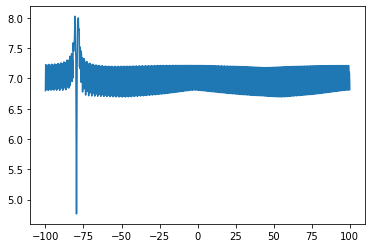

In [258]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(T,y)

In [194]:
grid.params[grid.index]

array([248630.97], dtype=float32)

In [68]:
resbrute

array([4.34404299e+00, 5.78362881e-04, 3.21762196e+00])

In [199]:
np.linalg.eigvalsh(grid.generators[0])

array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [4]:
def exp_energy(E, beta):
    Z = np.exp(-beta*E)
    EZ = E*Z
    return np.sum(EZ)/np.sum(Z)

In [6]:
# X = f.set_origin(X)

In [7]:
# X += 0.1*np.eye(X.shape[0])

### reweightin

In [268]:
X = np.load("../array/MG_union_bond.npy")
Y = lf.positive_map_np(X) / 1.5

In [266]:
np.save("../array/MG_union_abs.npy",Y)
np.save("../array/MG_union_bond_mod.npy", X)

In [267]:
L = 2
H = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H += f.l2nl(X, L, [i, (i+1)%L], sps = 8)    
    
H_abs = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H_abs += f.l2nl(Y, L, [i, (i+1)%L], sps = 8) 
    
print("rate of ground state energy = ", np.linalg.eigvalsh(H_abs)[-1] / np.linalg.eigvalsh(H)[-1])

rate of ground state energy =  0.9996004939667932


In [270]:
T = 0.5
beta = 1/T
E_abs = np.linalg.eigvalsh(H_abs)
E= np.linalg.eigvalsh(H)
print("expected weigh rate is : ",np.exp(beta*E).sum() / np.exp(beta*E_abs).sum(), "at T = ", T)

expected weigh rate is :  1.8168268609655733 at T =  0.5


### reweight + scheme1

In [58]:
X = np.load("../array/MG_union_rns_bond.npy")
Y = lf.positive_map_np(X) / 1.3911

In [59]:
L = 2
H = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H += f.l2nl(X, L, [i, (i+1)%L], sps = 8)    
    
H_abs = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H_abs += f.l2nl(Y, L, [i, (i+1)%L], sps = 8) 
    
print("rate of ground state energy = ", np.linalg.eigvalsh(H_abs)[-1] / np.linalg.eigvalsh(H)[-1])

rate of ground state energy =  0.9999906947911646


In [80]:
Y[np.abs(Y) < 1E-10] = 0
X[np.abs(X) < 1E-9] = 0

In [81]:
np.save("../array/MG_union_abs2.npy",Y)
np.save("../array/MG_union_bond_mod2.npy", X)

In [85]:
T = 0.5
beta = 1/T
E_abs = np.linalg.eigvalsh(H_abs)
E= np.linalg.eigvalsh(H)
print("expected energy: ",exp_energy(E, -beta), "at T = ", T)
print("expected weigh rate is : ",np.exp(beta*E).sum() / np.exp(beta*E_abs).sum(), "at T = ", T)

expected energy:  1.6903445121580893 at T =  0.5
expected weigh rate is :  1.6081105899390657 at T =  0.5


#### 相似変換

In [219]:
X = np.load("../array/MG_union_rns_bond.npy")
Y = np.load("../array/MG_union_rns_bond.npy")



from scipy.stats import ortho_group  # Requires version 0.18 of scipy

m = ortho_group.rvs(dim=8)
m = np.eye(8)
lam = (np.random.rand(8)-1/2) + 1
n = ortho_group.rvs(dim=8)
# n = np.eye(8)

A = m @ np.diag(lam) @ n
A_inv = n.T @ np.diag(1/lam) @ m.T
B = np.kron(A,A)
B_inv = np.kron(A_inv, A_inv)

In [220]:
X_prime = B @ X @ B_inv
Y_prime = lf.positive_map_np(X_prime)
L = 2

H = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H += f.l2nl(X_prime, L, [i, (i+1)%L], sps = 8)    
    
H_abs = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H_abs += f.l2nl(Y_prime, L, [i, (i+1)%L], sps = 8) 
    
# print("rate of ground state energy = ", np.linalg.eigvals(H_abs)[-1] / np.linalg.eigvals(H)[-1])

In [221]:
np.save("../array/MG_union_bond_sim.npy", X_prime)
np.save("../array/MG_union_bond_sim_abs.npy", Y_prime)

In [222]:
np.max(np.linalg.eigvals(H_abs).real) / np.max(np.linalg.eigvals(H).real)

3.5417897164689784

### virtual hamiltonianをひえるみーとにする

In [257]:
X = np.load("../array/MG_union_rns_bond.npy")
Y = np.load("../array/MG_reweight.npy")

In [258]:
L = 2
H = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H += f.l2nl(X, L, [i, (i+1)%L], sps = 8)   
print("target values : ",np.linalg.eigvalsh(H)[-1])

target values :  2.2499999999999973


In [260]:
H_abs = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H_abs += f.l2nl(Y, L, [i, (i+1)%L], sps = 8) 
    
print("initial value : ", np.max(np.linalg.eigvals(H_abs).real))

initial value :  3.457806879034708


In [264]:
T = 0.5
beta = 1/T
E_abs = np.linalg.eigvalsh(H_abs)
E= np.linalg.eigvalsh(H)
print("expected weigh rate is : ",np.exp(beta*E).sum() / np.exp(beta*E_abs).sum(), "at T = ", T)
print("expected energy : ", exp_energy(E, -beta))

expected weigh rate is :  0.06898474724431898 at T =  0.5
expected energy :  1.6903445121580893


In [252]:
for a in np.linspace(0.1, 10, 100):
    Z = a*np.tril(Y, k =-1) + np.diag(np.diag(Y)) + np.triu(Y, k =1)/a
    H_z = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
    for i in range(L):
        H_z += f.l2nl(Z, L, [i, (i+1)%L], sps = 8) 

    print("initial value : ", np.max(np.linalg.eigvals(H_z).real), " a = ", a)

initial value :  14.543604945852746  a =  0.1
initial value :  7.77621160841454  a =  0.2
initial value :  5.616410081043032  a =  0.30000000000000004
initial value :  4.607528465051908  a =  0.4
initial value :  4.058320717862684  a =  0.5
initial value :  3.7384915780730745  a =  0.6
initial value :  3.549452342607605  a =  0.7000000000000001
initial value :  3.4419933775689917  a =  0.8
initial value :  3.3888357972137833  a =  0.9
initial value :  3.373651667137916  a =  1.0
initial value :  3.3860749200910387  a =  1.1
initial value :  3.419209093669221  a =  1.2000000000000002
initial value :  3.4682874139118844  a =  1.3000000000000003
initial value :  3.5299087357156824  a =  1.4000000000000001
initial value :  3.601580243234463  a =  1.5000000000000002
initial value :  3.6814323923806307  a =  1.6
initial value :  3.768034941101636  a =  1.7000000000000002
initial value :  3.8602745965127525  a =  1.8000000000000003
initial value :  3.957271473923664  a =  1.9000000000000001
i

In [226]:
T = 1
beta = 1/T
E_abs = np.linalg.eigvalsh(H_abs)
E= np.linalg.eigvalsh(H)
print("expected weigh rate is : ",np.exp(beta*E).sum() / np.exp(beta*E_abs).sum(), "at T = ", T)

expected weigh rate is :  0.8163082000259331 at T =  1


In [45]:
np.save("../array/MG_union_abs.npy",Y)
np.save("../array/MG_union_bond_mod.npy", X)